# Stochastic Gradient Descent (SGD)

### Objective: Setup SGD classifier 

10/4/2018<br>
Mooyoung Lee

# Iris dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target.astype(np.int)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Scale data

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)

# SGD grid search

hinge = SVM<br>
log = logistic regression

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters = {'loss' : ['hinge','log','modified_huber','squared_hinge','perceptron'],
                   'alpha' : [.0001, .001, .01, .1, 1, 10]}

clf = RandomizedSearchCV(SGDClassifier(), tuned_parameters, cv=10, n_iter = 15, verbose = 0)
clf.fit(X, y)

## Print Results
print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("Grid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\M

Best parameters set found on development set:

{'loss': 'perceptron', 'alpha': 1}
Grid scores on development set:

0.900 (+/-0.149) for {'loss': 'log', 'alpha': 0.001}
0.927 (+/-0.126) for {'loss': 'perceptron', 'alpha': 1}
0.727 (+/-0.093) for {'loss': 'modified_huber', 'alpha': 1}
0.787 (+/-0.167) for {'loss': 'squared_hinge', 'alpha': 1}
0.813 (+/-0.205) for {'loss': 'perceptron', 'alpha': 0.001}
0.847 (+/-0.120) for {'loss': 'hinge', 'alpha': 0.01}
0.853 (+/-0.155) for {'loss': 'log', 'alpha': 0.01}
0.827 (+/-0.160) for {'loss': 'modified_huber', 'alpha': 0.1}
0.847 (+/-0.179) for {'loss': 'perceptron', 'alpha': 0.1}
0.333 (+/-0.000) for {'loss': 'modified_huber', 'alpha': 10}
0.333 (+/-0.000) for {'loss': 'perceptron', 'alpha': 10}
0.787 (+/-0.144) for {'loss': 'modified_huber', 'alpha': 0.0001}
0.727 (+/-0.202) for {'loss': 'squared_hinge', 'alpha': 0.0001}
0.393 (+/-0.242) for {'loss': 'squared_hinge', 'alpha': 10}
0.833 (+/-0.107) for {'loss': 'modified_huber', 'alpha': 0.001}


C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\M

# SGD Cross Validation

In [16]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
cv_obj = StratifiedKFold(n_splits = 10, shuffle = True)
clf = SGDClassifier(loss = 'perceptron', alpha = 1)

result_acc = []
result_conf = []
for train_index, test_index in cv_obj.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    
    acc = accuracy_score(y_true = y_test, y_pred = y_hat)
    conf = confusion_matrix(y_true = y_test, y_pred = y_hat)
    
    result_acc.append(acc)   # save result scores
    result_conf.append(conf)
    
# Result Summary
result_fold = pd.DataFrame(result, columns = ['Accuracy'])
print('\nCV result :\n', result_fold)
print('\nCV average :\n', result_fold.mean())


CV result :
    Accuracy
0  0.733333
1  0.933333
2  0.866667
3  0.933333
4  0.866667
5  0.933333
6  0.866667
7  0.866667
8  1.000000
9  0.933333

CV average :
 Accuracy    0.893333
dtype: float64


C:\Users\ML\Anaconda3\envs\kerasGPU\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


# Visualize Confusion Matrix

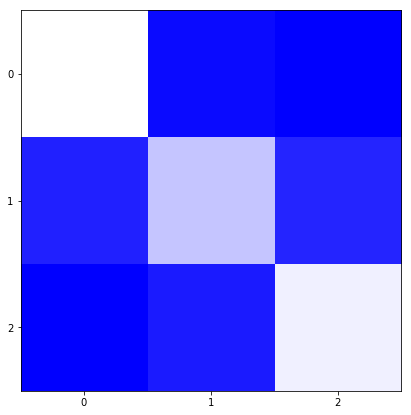

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

# custom color scheme
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","white"])

# averaged confusion matrix
conf_avg = np.mean(result_conf, axis = 0)

# plot
plt.figure(figsize = (7,7))
plt.yticks(np.arange(conf_avg.shape[0]))
plt.xticks(np.arange(conf_avg.shape[1]))
plt.imshow(conf_avg, cmap = cmap)